## Convolutional Neural Network 

A Convolutional Neural Network (CNN) is a type of deep learning model that is particularly effective in image classification and recognition tasks.

CNNs consist of several layers that are designed to extract features from an input image. The first layer is typically a convolutional layer, which applies a set of filters to the input image to identify patterns and features at different scales and orientations. These filters are learned during the training process. The next layer is usually a pooling layer, which reduces the spatial dimension of the output of the convolutional layer. This helps to reduce the number of parameters in the model and prevent overfitting. The process of applying convolutional and pooling layers is repeated several times to extract higher-level features from the input image. The final layer is typically a fully connected layer, which uses the extracted features to classify the input image into one of several categories. Each layer can learn more specific and meaningful features than the previous one, allowing the network to extract increasingly high-level representations of the input image. The convolutional layers built into the network reduce the dimensionality of images while still preserving their important features.

CNNs have been used with great success in many applications, including object detection, image segmentation, and natural language processing. They have also been used to generate realistic images and videos, and to learn representations that can be used in other machine learning tasks.

### Importing required libraries

In [12]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import keras
from keras.datasets import cifar10

### Preparing the dataset

In [13]:
# Loading the data

# define num_class
num_classes = 10
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
# Converting the 50000 , 32*32*3 images into 50000 * 3072 arrays
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = y_train.flatten()
y_test = y_test.flatten()

# normalize the datasets
x_train /= 255.
x_test /= 255.

In [15]:
print(x_train.shape , "train shape")
print(x_test.shape , "test shape")
print(y_train.shape , "train shape")
print(y_test.shape , "test shape")

(50000, 3072) train shape
(10000, 3072) test shape
(50000,) train shape
(10000,) test shape


### Defining the model
It consists of two sets of Convolutional layers using relu activation function with MaxPooling and Dropout layers in between. This is followed by a fully connected layer with Dropout layers and a final output layer with Softmax activation. The model is designed to classify images into the 10 classes.

In [18]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape= (32,32,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')   
    ])

In [19]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [67]:
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fitting the model

In [68]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5336 - accuracy: 0.4374 - val_loss: 1.2075 - val_accuracy: 0.5699
Epoch 2/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1355 - accuracy: 0.5979 - val_loss: 0.9380 - val_accuracy: 0.6722
Epoch 3/50
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9752 - accuracy: 0.6562 - val_loss: 0.8390 - val_accuracy: 0.7072
Epoch 4/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8742 - accuracy: 0.6928 - val_loss: 0.7782 - val_accuracy: 0.7276
Epoch 5/50
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8045 - accuracy: 0.7177 - val_loss: 0.7250 - val_accuracy: 0.7448
Epoch 6/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7631 - accuracy: 0.7322 - val_loss: 0.7139 - val_accuracy: 0.7538
Epoch 7/50
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7259 - accuracy: 0.7456 - val_loss: 0.7111 -

### Accuracy

In [99]:
from sklearn.metrics import classification_report,accuracy_score
from matplotlib import pyplot as plt
ypred = model2.predict(x_test).argmax(axis = 1)

313/313 [==============================] - 2s 7ms/step


In [100]:
accuracy_score = (y_test, ypred)

In [101]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1000
           1       0.91      0.89      0.90      1000
           2       0.73      0.66      0.70      1000
           3       0.64      0.56      0.60      1000
           4       0.77      0.76      0.76      1000
           5       0.75      0.71      0.73      1000
           6       0.71      0.92      0.80      1000
           7       0.89      0.81      0.85      1000
           8       0.79      0.93      0.86      1000
           9       0.86      0.87      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



**Accuracy of CNN model is 79%. This model gives the best accuracy of all the previous models indicating that CNN is one among the most suitable models for image classfication.**

In [105]:
# Retrieve list of results on training and test data sets for each training epoch
from matplotlib import pyplot as plt
acc      = history2.history['accuracy']
val_acc  = history2.history['val_accuracy']
loss     = history2.history['loss']
val_loss = history2.history['val_loss']

# Get number of epochs
epochs   = range(len(acc)) 

<Figure size 640x480 with 0 Axes>

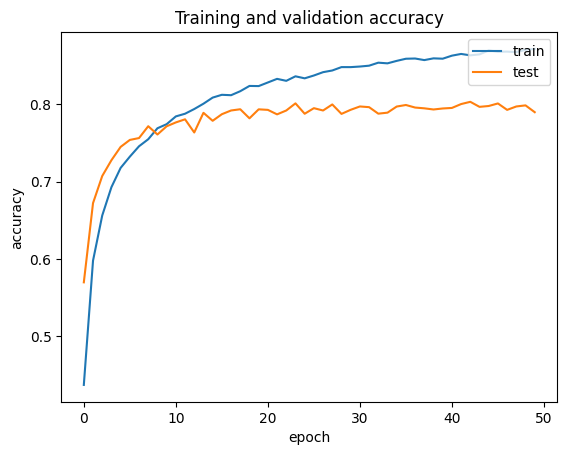

<Figure size 640x480 with 0 Axes>

In [106]:
# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.figure()

Unlike deep neural network (without convolution), the CNN is not overfitting on training data. The training and test accuracy are close to each other. The validation accuracy increases rapidly in the first ten epochs, indicating that the network is learning fast and the curve flattens in the later epochs indicating that not too many epochs are required to train the model further.

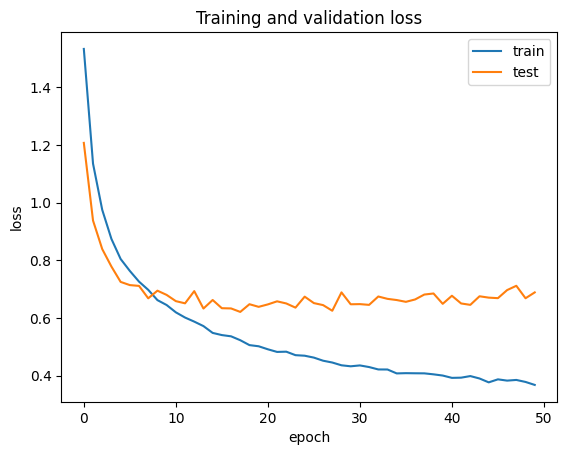

In [107]:
# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

The loss decreases rapidly in the first twenty epochs on training set. The loss for the test set does not decrease at the same rate as the training set and remains almost flat for multiple epochs. This indicates that the model is generalizing well to unseen data.

## Support Vector Machine (SVM) Linear Kernal

Support Vector Machines (SVM) is a supervised learning algorithm that can be used for classification or regression tasks. SVM with a linear kernel is a variant of SVM where the kernel function used is a linear function. The linear kernel maps the input data to a high-dimensional space in which the data can be separated by a hyperplane. SVM with a linear kernel is generally used when the data is linearly separable. They are useful in high-dimensional spaces and only use a small subset of the training points or support vectors making them memory efficient.

In [1]:
# Importing required libraries
from keras.datasets import cifar10
import os
import numpy as np

# define num_class
num_classes = 10
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Loading the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
# Splitting dataset into train and validation sets
x_val = x_train[49000:, :].astype(np.float)
y_val = np.squeeze(y_train[49000:, :])

x_train = x_train[:49000, :].astype(np.float)
y_train = np.squeeze(y_train[:49000, :])
y_test = np.squeeze(y_test)
x_test = x_test.astype(np.float)

print(x_train.shape)
print(y_train.shape)

/var/folders/x8/nk_vkqbn0jz88d1bg1w6xwn00000gn/T/ipykernel_72319/1263043690.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_val = x_train[49000:, :].astype(np.float)
/var/folders/x8/nk_vkqbn0jz88d1bg1w6xwn00000gn/T/ipykernel_72319/1263043690.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = x_train[:49000, :].astype(np.f

(49000, 32, 32, 3)
(49000,)


/var/folders/x8/nk_vkqbn0jz88d1bg1w6xwn00000gn/T/ipykernel_72319/1263043690.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = x_test.astype(np.float)


In [3]:
# Reshape the 3-dimensional image data into a 2-dimensional format
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_val = np.reshape(x_val, (x_val.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
print(x_train.shape) 
print(x_train[0])

#Normalize the pixel values of the training data
x_train=((x_train/255)*2)-1 
print(x_train.shape)
print(x_train[0])

(49000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
(49000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [4]:
# Subset for first 10000 images and their labels
x_train=x_train[:10000,:]
y_train=y_train[:10000]
print(y_train)
print(x_train.shape)
print(y_train.shape)

[6 9 9 ... 1 1 5]
(10000, 3072)
(10000,)


### Training the model with regularization parameter of 0.1

In [8]:
# train model with regularization parameter of 0.1.
from sklearn import svm
svc = svm.SVC(probability = False, kernel = 'linear', C = 0.1)
svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [9]:
svc_test = svc.predict(x_val)
acc_test = np.mean(svc_test == y_val)
print('Test Accuracy = {0:f}'.format(acc_test)) 

Test Accuracy = 0.293000


### Training the model with regularization parameter of 0.010

In [5]:
# train model with regularization parameter of 0.010
from sklearn import svm
svc2 = svm.SVC(probability = False, kernel = 'linear', C = 0.010)
svc2.fit(x_train, y_train)

SVC(C=0.01, kernel='linear')

In [7]:
svc_test2 = svc2.predict(x_val)
acc_test2 = np.mean(svc_test2 == y_val)
print('Test Accuracy = {0:f}'.format(acc_test2))

Test Accuracy = 0.291000


The SVM model has been trained with two values for the regularization parameter C(0.1 and 0.010). The model's performance is poor in both cases. This is because linear SVM is a linear classifier that works well when the data is linearly separable. In the case of CIFAR-10 dataset, the classes are not linearly separable, and there is a lot of overlap between the features of different classes. This makes it difficult for a linear SVM to achieve high accuracy on this dataset. For a better accuracy with svm, the hyperparameter has to be properly tuned which is time consuming but in general the performance of cnn is better for image classfication.

## Final Comparison between models

| Model                        | Training Time(seconds) | Accuracy |
|------------------------------|---------------|----------|
| Logistic Regression with default solver | 112     | 40.5%      |
| Logistic Regression with saga solver | 1518     | 40.33%      |
| Random forest with default hyperparameters          | 312     | 46.88%      |
| Random forest with hyperparameter tuning         | 20592     | 47.37%      |
| Deep Neural Network without convolution layer        | 2732     | 47.11%      |
| Convolutional Neural Network | 2750         | 79%
| SVM with linear kernel                         | 247.8  | 29.3%      |

From the above results, convolutional neural networks (CNN) outperforms the other algorithms. This is because C